170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,538 (369.29 KB)

 Trainable params: 94,538 (369.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 148ms/step - accuracy: 0.2496 - loss: 1.9788 - val_accuracy: 0.4144 - val_loss: 1.5694
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 149ms/step - accuracy: 0.4337 - loss: 1.5427 - val_accuracy: 0.5039 - val_loss: 1.4040
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 149ms/step - accuracy: 0.5000 - loss: 1.3924 - val_accuracy: 0.5126 - val_loss: 1.3422
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 147ms/step - accuracy: 0.5304 - loss: 1.3036 - val_accuracy: 0.5589 - val_loss: 1.2172
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 143ms/step - accuracy: 0.5568 - loss: 1.2351 - val_accuracy: 0.5710 - val_loss: 1.1937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


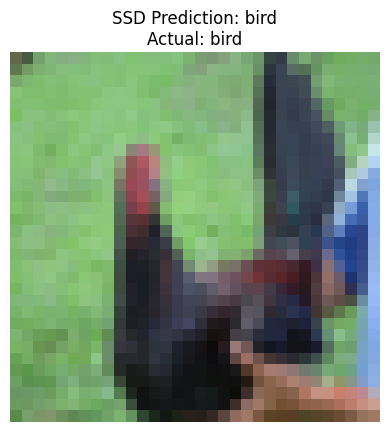

In [1]:
#CIFAR-10 Image Classification with SSD-Style CNN in TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------
# 1. Load CIFAR-10 Dataset
# -----------------------------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test  = x_test  / 255.0

# -----------------------------------------------------
# 2. Class Names
# -----------------------------------------------------
class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

# -----------------------------------------------------
# 3. SSD-STYLE BASE NETWORK (MobileNet-like)
# -----------------------------------------------------
inputs = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

# -----------------------------------------------------
# 4. SSD HEAD (Classification Only)
# -----------------------------------------------------
class_output = layers.Dense(10, activation='softmax', name="class_output")(x)

model = models.Model(inputs=inputs, outputs=class_output)

# -----------------------------------------------------
# 5. Compile Model
# -----------------------------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------------------
# 6. Train Model (Fast Demo)
# -----------------------------------------------------
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# -----------------------------------------------------
# 7. Test on CIFAR Image
# -----------------------------------------------------
index = 25
image = x_test[index]
label = y_test[index][0]

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = class_names[np.argmax(prediction)]

# -----------------------------------------------------
# 8. Display Result (SSD-Style Output)
# -----------------------------------------------------
plt.imshow(image)
plt.title(f"SSD Prediction: {predicted_class}\nActual: {class_names[label]}")
plt.axis("off")
plt.show()
